In [13]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    
    model.train(x, y, verbose = verbose)
    
    return model

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [15]:
x, y = generate_1D_mixed_gaussian()

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn, x_qcn])
x_dnn = scaler(x, mode="standard")

In [16]:
x, y = generate_1D_mixed_gaussian()

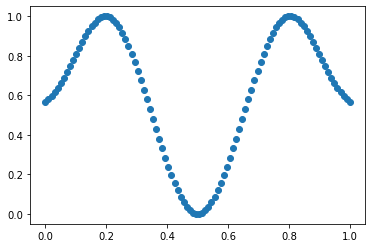

In [17]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=5),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_1D"))

epoch: 0, loss: 0.13209024177543846
epoch: 1, loss: 0.11440680469598491
epoch: 2, loss: 0.1027552604707016
epoch: 3, loss: 0.08988679141641795
epoch: 4, loss: 0.07959109915967323
epoch: 5, loss: 0.07347983770870156
epoch: 6, loss: 0.06956901619041175
epoch: 7, loss: 0.06526933723665074
epoch: 8, loss: 0.06101588426182048
epoch: 9, loss: 0.057893622879691825
epoch: 10, loss: 0.0557600065117
epoch: 11, loss: 0.05441768451676799
epoch: 12, loss: 0.05419954928904867
epoch: 13, loss: 0.05495167901644336
epoch: 14, loss: 0.055578014299572605
epoch: 15, loss: 0.05541153859407137
epoch: 16, loss: 0.05483193376059643
epoch: 17, loss: 0.05427750924699657
epoch: 18, loss: 0.05373289165851596
epoch: 19, loss: 0.053153225810155344
epoch: 20, loss: 0.05267760833608299
epoch: 21, loss: 0.05235811083020934
epoch: 22, loss: 0.052040251168435844
epoch: 23, loss: 0.051589435459180814
epoch: 24, loss: 0.051096392355337146
epoch: 25, loss: 0.0507572895697857
epoch: 26, loss: 0.050605738215689235
epoch: 27,

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots=0)
    
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)     
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_10000"))

## 2D function

### Generate Data

In [ ]:
n = 12
x, y = generate_2D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = np.hstack([x_qcn, x_qcn[:,0:1]])
x_dnn = scaler(x, mode="standard")

In [ ]:
plt.imshow(y.reshape(n,n))
plt.colorbar()
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(1):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [3,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=10)
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])
    print(x_qnn.shape)

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_2D"))

In [ ]:
plt.imshow(y_pred.reshape(n,n))
plt.plot()

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(1):
    qcn = sequential_qnn(n_qubits = [4],
                         dim = [2, 1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=4),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(1) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qnn_2D"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qcn_list.append([qcn, x_qcn, y, False])
    
qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   

saver(qcn_list, data_path("trainability_qcn_2D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
   
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_10000"))

## 3D function

### Generate Data

In [ ]:
n = 6
x, y = generate_3D_mixed_gaussian()
x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_qnn = x_qcn
x_dnn = scaler(x, mode="standard")

In [ ]:
plt.imshow(y.reshape(n,n,n)[1])
plt.colorbar()
plt.show()

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(n_qubits = [4],
                         dim = [2,1],
                         encoder = RZZEncoder(),
                         ansatz = Ansatz(blocks=["entangle", "ry"], reps=11)
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qnn_list.append([qnn, x_qnn, y, False])
    print(x_qnn.shape)

    
qnn_list[0][3] = True

with mp.Pool(10) as p:
    qnn_list = p.map(parallel, qnn_list) 
    
    
saver(qnn_list, data_path("trainability_qnn_3D"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_10000"))

# Trainability, Noisy

In [ ]:
backend_santiago = pickle.load(open("backend_santiago", "rb"))

## 1D, Gaussian Data

### Generate data

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

In [ ]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training models

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 8192)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1_noisy"))

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 8192)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2_noisy"))

In [ ]:
epoch: 0, loss: 0.15239299861811456
epoch: 1, loss: 0.08257248353374153
epoch: 2, loss: 0.08128709729381343
epoch: 3, loss: 0.06450038365689272
epoch: 4, loss: 0.044012149619208435
epoch: 5, loss: 0.032987418300738564
epoch: 6, loss: 0.03292349602115554